# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city.replace(" ","+") + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | gbadolite
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | n'zeto
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | sitka
Processing Record 10 of Set 1 | arac
Processing Record 11 of Set 1 | buka
Processing Record 12 of Set 1 | kone
Processing Record 13 of Set 1 | tralee
Processing Record 14 of Set 1 | saipan
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | isafjordur
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | hermanus
Processing Record 23 of Set 1 |

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,13.43,77,98,2.24,ZA,1686606879
1,albany,42.6001,-73.9662,26.23,52,100,0.89,US,1686606651
2,gbadolite,4.2833,21.0167,21.85,95,86,0.69,CD,1686606949
3,yellowknife,62.4560,-114.3525,9.29,57,75,6.17,CA,1686606622
4,puerto ayora,-0.7393,-90.3518,29.98,88,47,2.68,EC,1686606840


In [6]:
# Set the desired path and file name
file_path = r'C:\Users\ndbap\Documents\Bootcamp_UofT\Python-API-challenge\output_data\cities.csv'

# Save the DataFrame to CSV
city_data_df.to_csv(file_path, index_label='City ID')

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.89,98,100,13.47,TF,1686592859
1,chavusy,53.8075,30.9712,14.12,58,100,5.39,BY,1686593046
2,enewetak,11.3474,162.3373,27.74,83,84,7.84,MH,1686592872
3,haapavesi,64.1333,25.3667,17.98,40,99,4.67,FI,1686593046
4,constantia,44.1833,28.6500,19.38,66,78,6.58,RO,1686592631


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

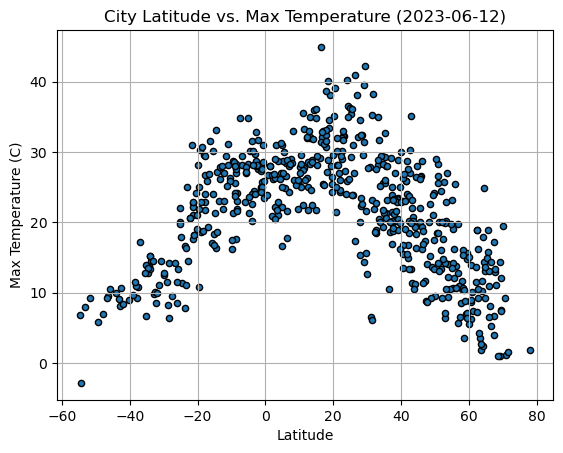

In [8]:
# Build scatter plot for latitude vs. temperature
lat_temp_scatter = city_data_df.plot.scatter(
    x='Lat', y='Max Temp',
    xlabel= 'Latitude', ylabel= 'Max Temperature (C)',
    edgecolor='black',
    title= 'City Latitude vs. Max Temperature (2023-06-12)'
    )
# Incorporate the other graph properties
lat_temp_scatter.grid(True)

# Save the figure
fig1_path = r"C:\Users\ndbap\Documents\Bootcamp_UofT\Python-API-challenge\output_data\Fig1.png"
plt.savefig(fig1_path)

# Show plot
plt.show()

#### Latitude Vs. Humidity

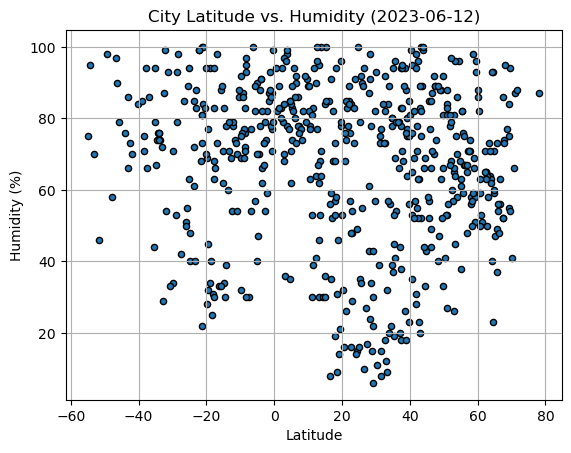

In [9]:
# Build the scatter plots for latitude vs. humidity
lat_humidity_scatter = city_data_df.plot.scatter(
    x='Lat', y='Humidity',
    xlabel= 'Latitude', ylabel= 'Humidity (%)',
    edgecolor='black',
    title= 'City Latitude vs. Humidity (2023-06-12)'
    )
# Incorporate the other graph properties
lat_humidity_scatter.grid(True)

# Save the figure
fig2_path = r"C:\Users\ndbap\Documents\Bootcamp_UofT\Python-API-challenge\output_data\Fig2.png"
plt.savefig(fig2_path)

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

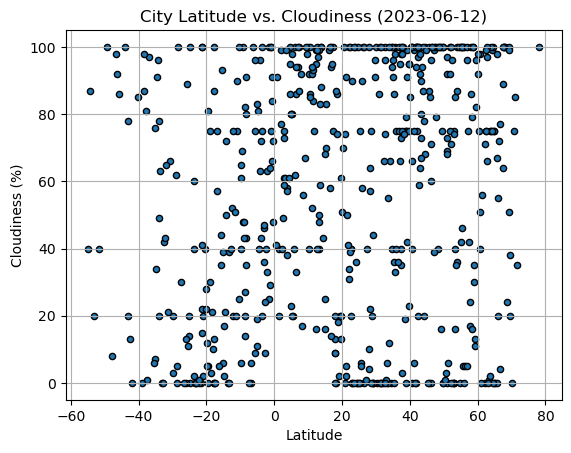

In [10]:
# Build the scatter plots for latitude vs. cloudiness
lat_cloudiness_scatter = city_data_df.plot.scatter(
    x='Lat', y='Cloudiness',
    xlabel= 'Latitude', ylabel= 'Cloudiness (%)',
    edgecolor='black',
    title= 'City Latitude vs. Cloudiness (2023-06-12)'
    )
# Incorporate the other graph properties
lat_cloudiness_scatter.grid(True)

# Save the figure
fig3_path = r"C:\Users\ndbap\Documents\Bootcamp_UofT\Python-API-challenge\output_data\Fig3.png"
plt.savefig(fig3_path)

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

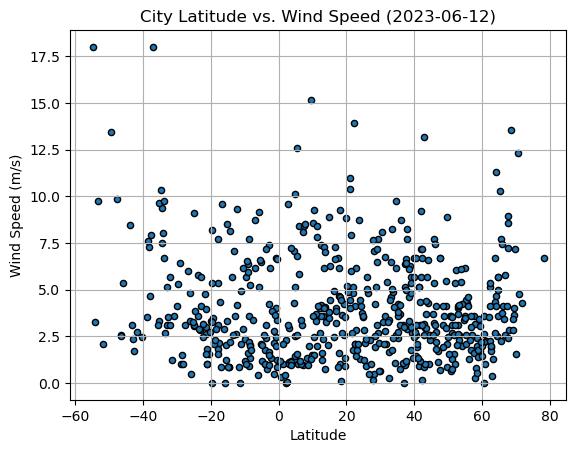

In [11]:
# Build the scatter plots for latitude vs. wind speed
lat_cloudiness_scatter = city_data_df.plot.scatter(
    x='Lat', y='Wind Speed',
    xlabel= 'Latitude', ylabel= 'Wind Speed (m/s)',
    edgecolor='black',
    title= 'City Latitude vs. Wind Speed (2023-06-12)'
    )
# Incorporate the other graph properties
lat_cloudiness_scatter.grid(True)

# Save the figure
fig4_path = r"C:\Users\ndbap\Documents\Bootcamp_UofT\Python-API-challenge\output_data\Fig4.png"
plt.savefig(fig4_path)

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, hemisphere):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create the plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(hemisphere)

    print(f"The r-value is: {rvalue}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,chavusy,53.8075,30.9712,14.12,58,100,5.39,BY,1686593046
2,enewetak,11.3474,162.3373,27.74,83,84,7.84,MH,1686592872
3,haapavesi,64.1333,25.3667,17.98,40,99,4.67,FI,1686593046
4,constantia,44.1833,28.6500,19.38,66,78,6.58,RO,1686592631
5,vikhorevka,56.1201,101.1636,13.77,67,100,1.26,RU,1686593046


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.89,98,100,13.47,TF,1686592859
6,kone,-21.0595,164.8658,18.16,84,2,1.80,NC,1686592905
8,mangai,-4.0500,19.5333,22.64,88,96,1.03,CD,1686593047
9,grytviken,-54.2811,-36.5092,-2.84,95,87,3.24,GS,1686592859
12,kirakira,-10.4544,161.9205,26.27,86,25,2.90,SB,1686592914


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7098831305791756


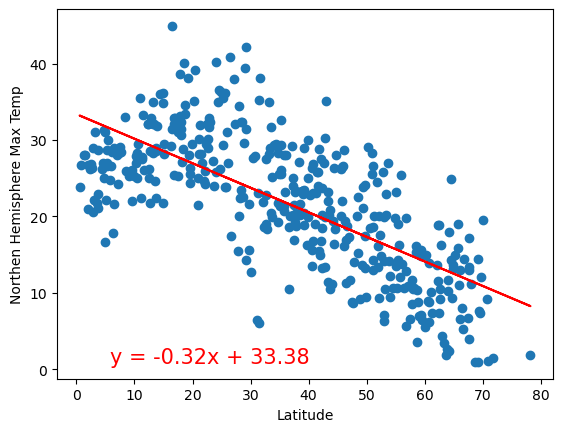

In [15]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],'Northen Hemisphere Max Temp')

The r-value is: 0.8294268129791926


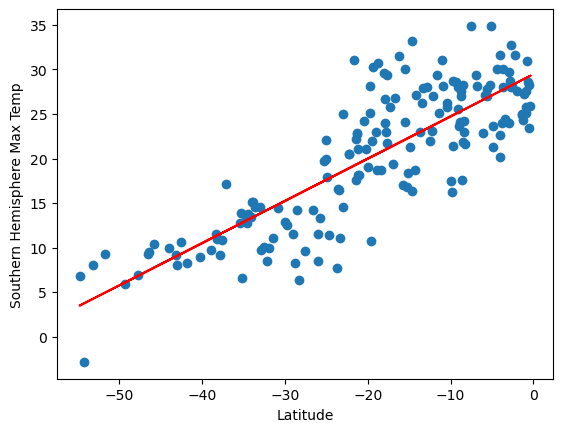

In [16]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Southern Hemisphere Max Temp')

**Analysis:** There is a significant relationship between latitude and maximum temperature in both hemispheres. In the Northern Hemisphere, as you move further away from the equator towards the North Pole, temperatures tend to decrease. Conversely, in the Southern Hemisphere, as you move closer to the equator from the South Pole, temperatures tend to increase.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.05060564006834156


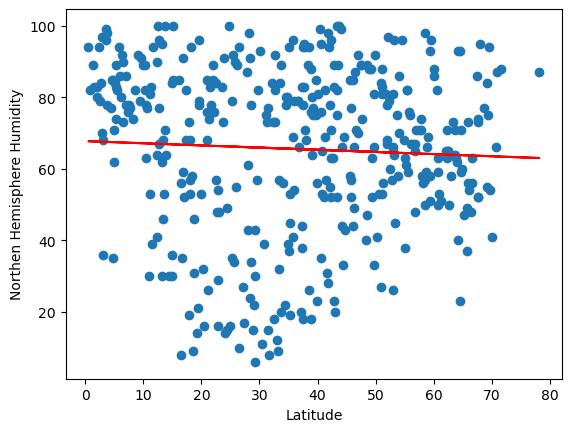

In [17]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],'Northen Hemisphere Humidity')

The r-value is: 0.006307837736004463


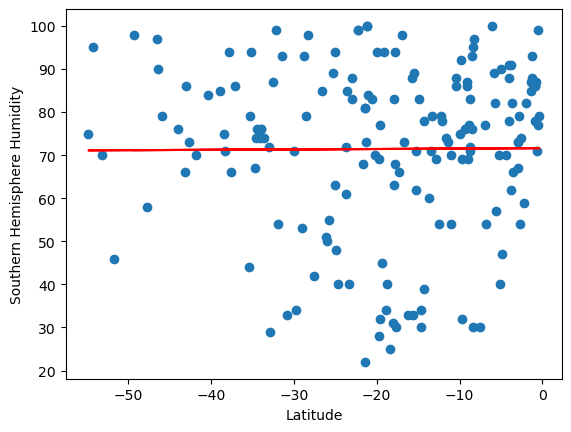

In [18]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],'Southern Hemisphere Humidity')

**Analysis:** There is no meaningful relationship between latitude and humidity in both the Northern and Southern Hemispheres. The low absolute values of the r-values suggest that latitude does not have a significant impact on humidity levels in either hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.009163063655252476


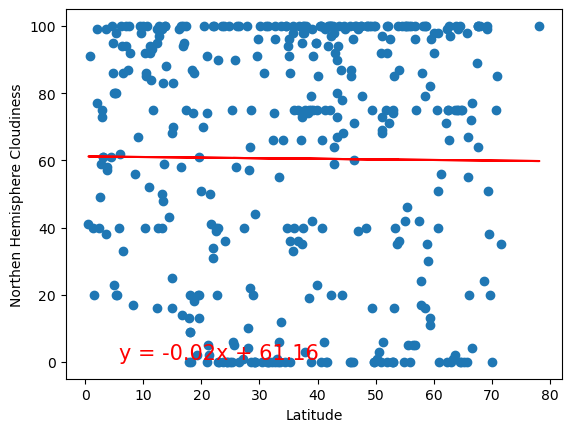

In [19]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],'Northen Hemisphere Cloudiness')

The r-value is: 0.05178019295655038


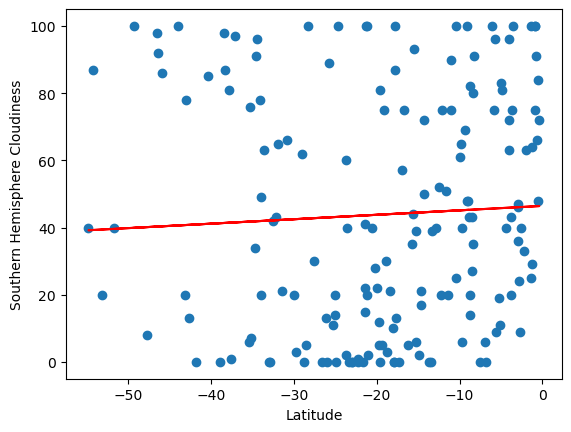

In [20]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],'Southern Hemisphere Cloudiness')

**Analysis:** There is no meaningful relationship between latitude and cloudiness in both the Northern and Southern Hemispheres. The low absolute values of the r-values suggest that latitude does not have a significant impact on cloudiness levels in either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.017004376113122478


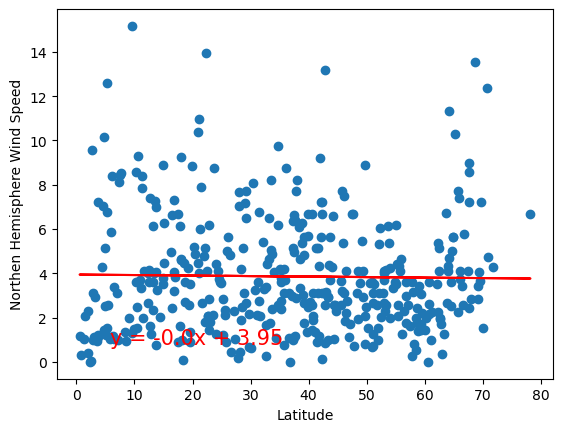

In [21]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],'Northen Hemisphere Wind Speed')

The r-value is: -0.3275620915124741


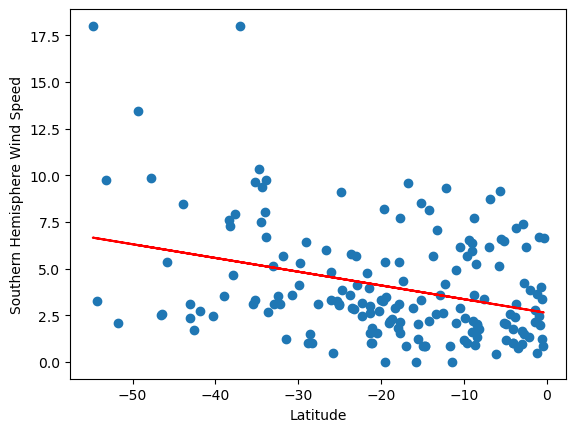

In [22]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],'Southern Hemisphere Wind Speed')

**Analysis:** There is a weak to negligible relationship between latitude and wind speed in both hemispheres. In the Northern Hemisphere, there is no significant correlation, while in the Southern Hemisphere, there is a moderate negative correlation, indicating that wind speeds tend to decrease as latitude increases towards the Equator from the South Pole.